In [1]:
import pandas as pd

price = pd.read_csv("data/ENERGY_SETTLEMENT_PRICE.csv", parse_dates=["TIME"], index_col="TIME")["VALUE"]
price

TIME
2018-01-01 01:00:00     72.05
2018-01-01 02:00:00     72.05
2018-01-01 03:00:00     72.05
2018-01-01 04:00:00     72.05
2018-01-01 05:00:00     71.15
                        ...  
2023-03-10 20:00:00    788.80
2023-03-10 21:00:00    786.00
2023-03-10 22:00:00    720.91
2023-03-10 23:00:00    708.64
2023-03-11 00:00:00    596.11
Name: VALUE, Length: 45475, dtype: float64

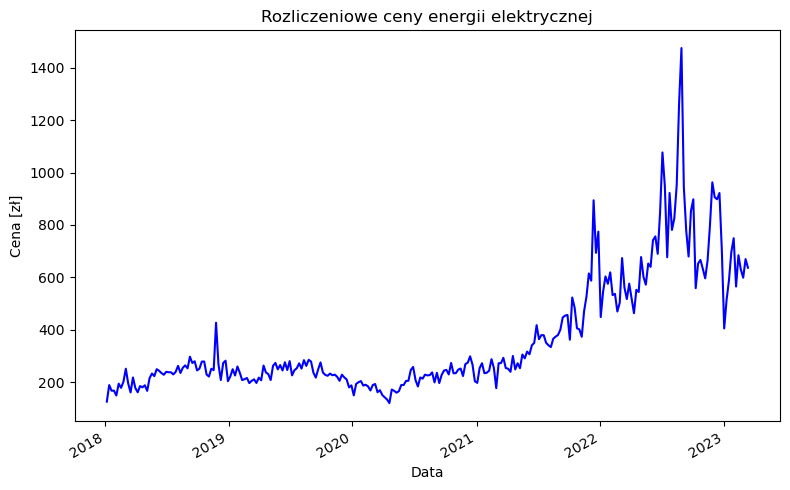

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(price.resample("W").mean(), color="blue")
plt.xticks(rotation=30, ha='right')
 
plt.title('Rozliczeniowe ceny energii elektrycznej')
 
plt.xlabel('Data')
plt.ylabel('Cena [zł]')
plt.tight_layout()


In [3]:
from pandas import Grouper

groups = price.groupby(Grouper(freq='A'))
years = pd.DataFrame()

groups.agg("mean")
    
# years.boxplot()

TIME
2018-12-31    227.949423
2019-12-31    235.017765
2020-12-31    208.178511
2021-12-31    374.632682
2022-12-31    718.113914
2023-12-31    628.053923
Freq: A-DEC, Name: VALUE, dtype: float64

In [4]:
from datetime import datetime

y = 2000

def get_season(x: datetime) -> str:
    x = x.replace(year=y)
    
    if x < datetime(y, 3, 21) or x > datetime(y, 12, 22):
        return "Zima"
    elif x < datetime(y, 6, 22):
        return "Wiosna"
    elif x < datetime(y, 9, 23):
        return "Lato"
    else:
        return "Jesień"

holidays = pd.read_csv("holidays.csv", parse_dates=["Date"], usecols=["Date"]).squeeze().to_list()



In [113]:
df = price.to_frame()
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Season"] = list(map(get_season, df.index))
df["Day"] = list(map(lambda x: x.day, df.index))
df["Day_Of_Week"] = list(map(lambda x: x.dayofweek + 1, df.index))
df["Day_Name"] = list(map(lambda x: x.day_name(), df.index))
df["Is_Day_Off"] = list(map(lambda x: x.replace(hour=0) in holidays or x.day_name() in {"Sunday", "Suturday"}, df.index))



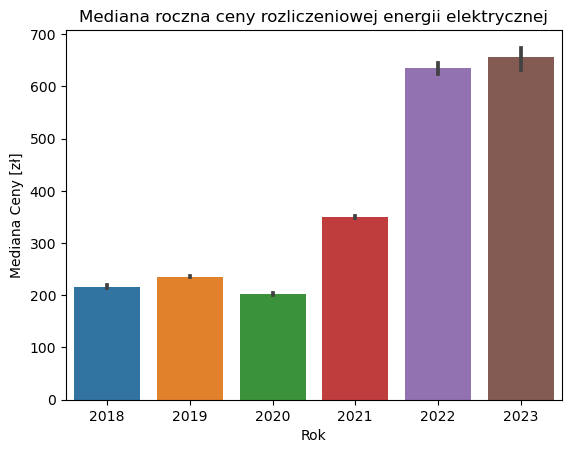

In [62]:
import seaborn as sns

sns.barplot(data=df, x="Year", y="VALUE", estimator="median").set(
    title='Mediana roczna ceny rozliczeniowej energii elektrycznej',
    xlabel='Rok',
    ylabel='Mediana Ceny [zł]'
);

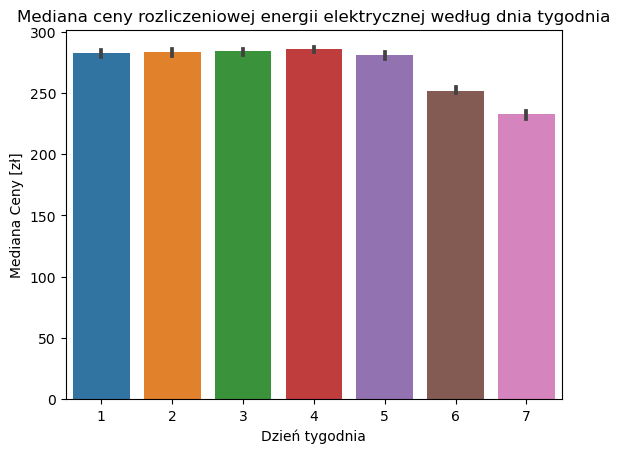

In [115]:
sns.barplot(data=df, x="Day_Of_Week", y="VALUE", estimator="median").set(
 
    title='Mediana ceny rozliczeniowej energii elektrycznej według dnia tygodnia',
    xlabel='Dzień tygodnia',
    ylabel='Mediana Ceny [zł]'
    
);

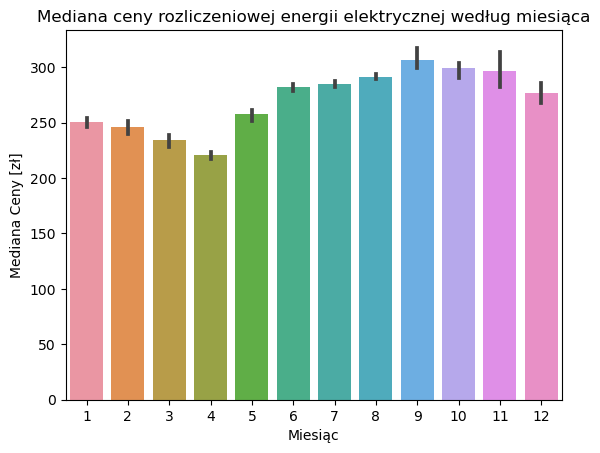

In [129]:
sns.barplot(data=df, x="Month", y="VALUE", estimator="median").set(
 
    title='Mediana ceny rozliczeniowej energii elektrycznej według miesiąca',
    xlabel='Miesiąc',
    ylabel='Mediana Ceny [zł]'
    
);

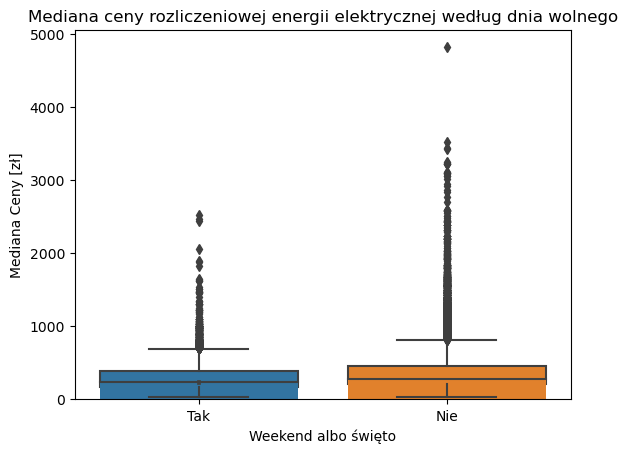

In [128]:
g = df.replace({False: "Nie", True: "Tak"})
fig = sns.barplot(data=g, x="Is_Day_Off", y="VALUE", estimator="median").set(
 
    title='Mediana ceny rozliczeniowej energii elektrycznej według dnia wolnego',
    xlabel='Weekend albo święto',
    ylabel='Mediana Ceny [zł]'
    
);

In [123]:
g

,VALUE,Year,Month,Season,Day,Day_Of_Week,Day_Name,Is_Day_Off
TIME,,,,,,,,
2018-01-01 01:00:00,72.05,2018,1,Zima,1,1,Monday,True
2018-01-01 02:00:00,72.05,2018,1,Zima,1,1,Monday,True
2018-01-01 03:00:00,72.05,2018,1,Zima,1,1,Monday,True
2018-01-01 04:00:00,72.05,2018,1,Zima,1,1,Monday,True
2018-01-01 05:00:00,71.15,2018,1,Zima,1,1,Monday,True
...,...,...,...,...,...,...,...,...
2023-03-10 20:00:00,788.80,2023,3,Zima,10,5,Friday,False
2023-03-10 21:00:00,786.00,2023,3,Zima,10,5,Friday,False
2023-03-10 22:00:00,720.91,2023,3,Zima,10,5,Friday,False


In [121]:
price.describe()

count    45475.000000
mean       362.735268
std        267.280844
min         24.880000
25%        203.480000
50%        271.900000
75%        438.805000
max       4813.000000
Name: VALUE, dtype: float64

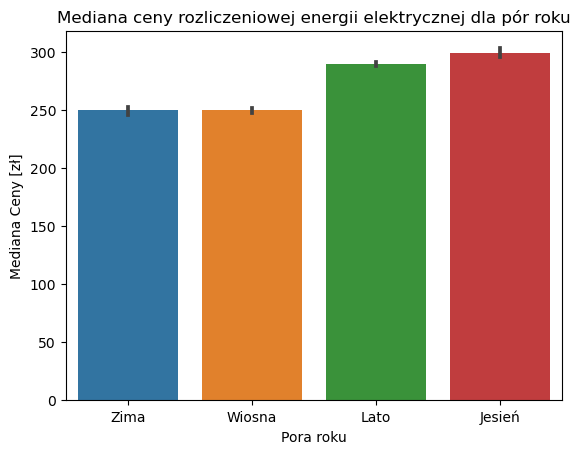

In [63]:
sns.barplot(data=df, x="Season", y="VALUE", estimator="median").set(
    title='Mediana ceny rozliczeniowej energii elektrycznej dla pór roku',
    xlabel='Pora roku',
    ylabel='Mediana Ceny [zł]'
);

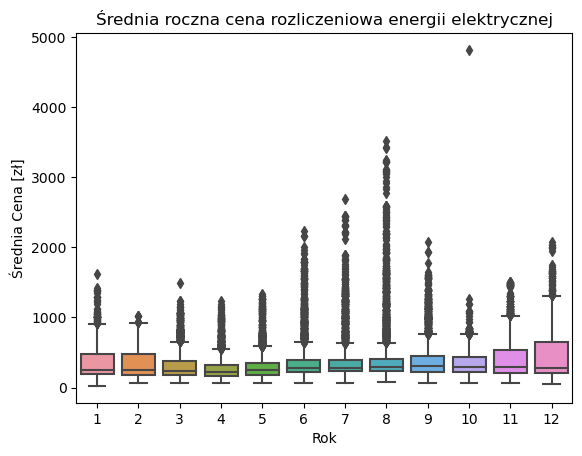

In [12]:
sns.boxplot(data=df, x="Month", y="VALUE").set(
    title='Średnia roczna cena rozliczeniowa energii elektrycznej',
    xlabel='Rok',
    ylabel='Średnia Cena [zł]'
);

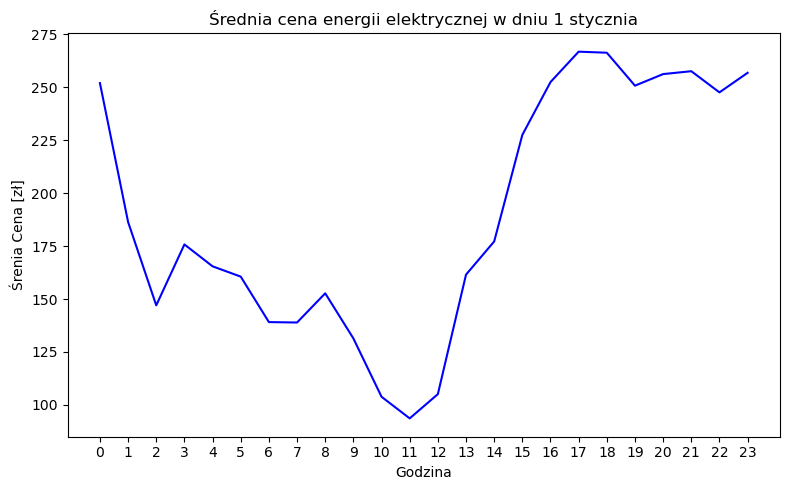

In [105]:
x = (df.index.day == 1) & (df.index.month == 1) 

ny = df.loc[x] 
mean = ny.groupby(ny.index.hour)["VALUE"].mean()

plt.figure(figsize=(8, 5))
plt.plot(mean, color="blue")
plt.xticks(range(0,24))
 
plt.title('Średnia cena energii elektrycznej w dniu 1 stycznia')
 
plt.xlabel('Godzina')
plt.ylabel('Śrenia Cena [zł]')
plt.tight_layout()

<AxesSubplot: xlabel='Month,Day'>

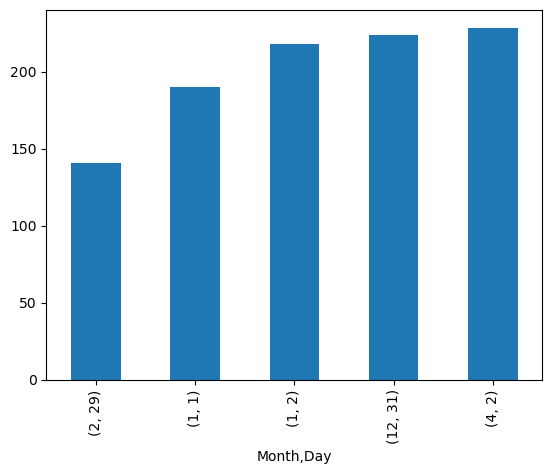

In [103]:
e = df.groupby([df.index.day, df.index.month])["VALUE"].mean().sort_values().iloc[:5]

c = [df.query("Day == {day} & Month == {month}".format(day=index[0], month=index[1])) for index in e.index]
# c.groupby(["Month", "Day"], as_index=False)["VALUE"].mean()
l = pd.concat(c).groupby(["Month", "Day"])["VALUE"].mean().sort_values()

# sns.barplot(data=l).set(
#     title='Mediana ceny rozliczeniowej energii elektrycznej dla pór roku',
#     xlabel='Pora roku',
#     ylabel='Mediana Ceny [zł]'
# );
l.plot.bar()

In [56]:
x = df["VALUE"].idxmin()

df.loc[x]

VALUE          24.88
Year            2023
Month              1
Season          Zima
Day           Sunday
Is_Day_Off      True
Name: 2023-01-01 12:00:00, dtype: object

In [44]:
demand = pd.read_csv("data/energy_demand.csv", parse_dates=["TIME"], index_col="TIME")["VALUE"]
demand

TIME
2018-01-01 01:00:00    14978.538
2018-01-01 02:00:00    14397.650
2018-01-01 03:00:00    13789.463
2018-01-01 04:00:00    13434.450
2018-01-01 05:00:00    13285.238
                         ...    
2023-03-11 13:00:00    21443.050
2023-03-11 14:00:00    21364.850
2023-03-11 15:00:00    20882.400
2023-03-11 16:00:00    20525.525
2023-03-11 17:00:00    20362.850
Name: VALUE, Length: 45492, dtype: float64

In [51]:
demand.groupby(demand.index.month).mean().sort_values()

TIME
5     17961.391215
6     18495.010803
8     18504.116429
4     18554.487403
7     18582.800845
9     18838.855995
10    19550.177894
3     20252.307102
11    20304.834898
12    20611.232453
1     20787.329642
2     20956.274259
Name: VALUE, dtype: float64